In [1]:
from Project1_Code import *
import matplotlib.pyplot as plt

# Mathematics for Machine Learning

In [2]:
B = np.array([[3, 2, 5, 1, 0, 2, 4, 3, 1, 0],             [0, 1, 3, 4, 1, 2, 0, 0, 2, 4],             [2, 1, 3, 4, 2, 5, 0, 0, 3, 0],             [0, 4, 2, 3, 7, 0, 2, 5, 2, 1],             [3, 0, 0, 2, 4, 1, 0, 3, 1, 0],             [2, 0, 0, 0, 5, 2, 0, 2, 0, 4],
             [3, 4, 0, 2, 0, 0, 2, 4, 5, 0],             [2, 5, 0, 0, 3, 2, 5, 0, 0, 0],             [3, 1, 3, 4, 0, 0, 0, 0, 3, 2],             [0, 0, 0, 3, 4, 0, 0, 2, 3, 0],             [3, 0, 0, 4, 0, 5, 2, 0, 0, 1],            [2, 2, 0, 3, 0, 4, 0, 0, 2, 3]])

# Get SVD
U, S, Vh = np.linalg.svd(B)

# Get Reduction
B_k = get_low_rank(U, S, Vh, 7)

# Visualize Reduction (it is possible to confirm with matrix_rank)
print(B_k)


[[ 3.35676648e+00  2.11864197e+00  5.04638519e+00  1.14623658e+00
   1.43841948e-01  1.70350412e+00  3.90106404e+00  2.68201426e+00
   8.39973945e-01 -8.34630528e-02]
 [ 2.93830412e-01  1.20681429e+00  3.16306893e+00  3.77081068e+00
   1.17571066e+00  1.96984562e+00 -3.20395946e-01 -2.95908559e-01
   2.08803280e+00  3.86850001e+00]
 [ 1.87766359e+00  6.49555358e-01  2.59956508e+00  5.04463828e+00
   1.76303279e+00  4.44463754e+00  7.42929493e-01  2.34224312e-01
   2.34317199e+00  2.16554226e-01]
 [ 2.76889580e-01  3.76410371e+00  2.12329689e+00  2.59010880e+00
   7.32681836e+00 -1.12888862e-01  2.16838229e+00  4.41447129e+00
   2.56499118e+00  9.73645005e-01]
 [ 2.56995097e+00 -2.27302445e-01 -4.78687737e-02  1.73818630e+00
   3.86986808e+00  1.36386506e+00  1.96980807e-01  3.30996346e+00
   1.32802704e+00  1.15154817e-01]
 [ 1.99203000e+00  7.41480342e-02 -1.44884829e-01  5.39237762e-01
   4.84310435e+00  1.77628404e+00  7.09769471e-02  2.20405076e+00
  -5.17900588e-01  4.03294311e+00

fro: [1.80165822e+01 1.48521088e+01 1.21886861e+01 9.72620211e+00
 7.99737375e+00 6.20761238e+00 4.17243467e+00 3.04792107e+00
 1.49934695e+00 3.23668642e-14]
 
nuc: [4.82075120e+01 3.80088798e+01 2.95223571e+01 2.21762656e+01
 1.66408324e+01 1.15986567e+01 7.00243651e+00 4.15298249e+00
 1.49934695e+00 7.27364238e-14]
 
inf: [1.66986793e+01 1.59561639e+01 1.22272438e+01 8.28970292e+00
 7.83286101e+00 8.00871230e+00 4.93252589e+00 4.84655306e+00
 2.47550641e+00 3.80693125e-14]
 
-inf: [1.12567550e+01 5.85683739e+00 4.88494198e+00 4.72056044e+00
 3.63053244e+00 1.89438555e+00 1.76877887e+00 5.70690821e-01
 2.18920058e-01 1.27162659e-14]
 
1: [2.46612680e+01 1.60915992e+01 1.59634894e+01 1.40899341e+01
 1.21812508e+01 8.31985001e+00 5.39338850e+00 3.84244841e+00
 2.44452601e+00 3.65521742e-14]
 
-1: [1.35401672e+01 8.11891727e+00 7.25156263e+00 4.19736994e+00
 3.49689606e+00 1.65701041e+00 1.36293083e+00 1.11594972e+00
 9.99009278e-02 2.07721045e-14]
 
sqrt: [3.24597235e+02 2.20585135e+02

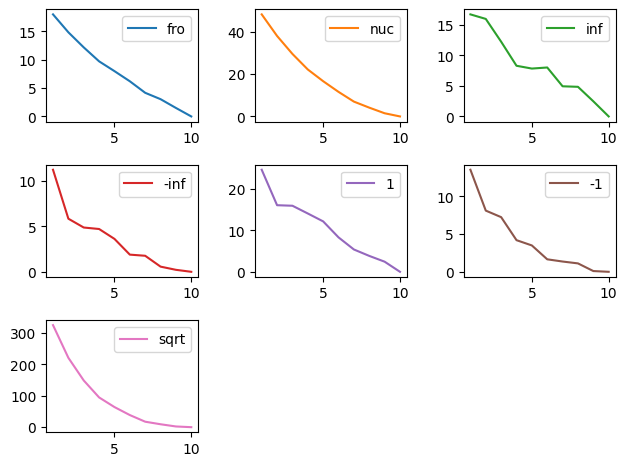

In [3]:
#list of norms
list = ['fro', 'nuc', np.inf, -np.inf, 1 , -1, 'sqrt']
colors = plt.rcParams["axes.prop_cycle"]()

X = range(1, np.size(S) + 1)

figure, axis = plt.subplots(3, 3)
figure.tight_layout(pad = 1.0)

figure.delaxes(axis[2, 2])
figure.delaxes(axis[2, 1])

i = 0
j = 0

# Iterate through norms
for norm in list:
    c = next(colors)["color"]
    axis[i, j].plot(X, get_errors(B, U, S, Vh, norm), label=norm, color=c)
    axis[i, j].legend()
    j = j + 1
    if j % 3 == 0:
        j = 0
        i = i + 1

plt.show()